In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Train Data

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /House pricing kaggle/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
data['YrSold_num'] = 2024 - data['YrSold']
data['YearBuilt_num'] = 2024 - data['YearBuilt']
data['GarageYrBlt_num'] = 2024 - data['GarageYrBlt']
data.drop(['YearBuilt', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [9]:
y = data['SalePrice']

In [16]:
data_obj = data.select_dtypes(include='object')
data_num = data.select_dtypes(exclude = 'object')

In [31]:
data_obj.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

###Fill data with modes of object columns

In [19]:
data_obj.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [25]:
data_obj["BsmtQual"]= data_obj["BsmtQual"].fillna(data_obj['BsmtQual'].mode()[0])
data_obj["BsmtCond"] = data_obj["BsmtCond"].fillna(data_obj['BsmtCond'].mode()[0])
data_obj['BsmtExposure']= data_obj['BsmtExposure'].fillna(data_obj['BsmtExposure'].mode()[0])
data_obj['BsmtFinType1'] = data_obj['BsmtFinType1'].fillna(data_obj['BsmtFinType1'].mode()[0])
data_obj['BsmtFinType2'] = data_obj['BsmtFinType2'].fillna(data_obj['BsmtFinType2'].mode()[0])
data_obj['Electrical'] = data_obj['Electrical'].fillna(data_obj['Electrical'].mode()[0])

In [ ]:
data_obj.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinType2        0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
data_obj.groupby('BldgType')['GarageType'].value_counts().sort_values(ascending=False)

BldgType  GarageType
1Fam      Attchd        748
          Detchd        314
TwnhsE    Attchd         91
1Fam      BuiltIn        81
Duplex    Detchd         22
Twnhs     Detchd         21
TwnhsE    Detchd         18
1Fam      Basment        16
Twnhs     Attchd         13
2fmCon    Detchd         12
Duplex    Attchd         11
2fmCon    Attchd          7
1Fam      CarPort         4
Duplex    CarPort         4
Twnhs     BuiltIn         4
1Fam      2Types          3
TwnhsE    Basment         3
Duplex    2Types          2
          BuiltIn         1
2fmCon    2Types          1
          BuiltIn         1
          CarPort         1
TwnhsE    BuiltIn         1
Name: count, dtype: int64

In [27]:
#took values from above groupby, whichever BldgType has highest Garagetype value
#1fam =  Attchd
#TwnhsE = Attchd
#Twnhs = Detchd
#Duplex = Detchd
#2fmCon = Detchd

btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gtype = ['Attchd', 'Detchd', 'Detchd', 'Detchd', 'Detchd']

for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i]) & (data_obj['GarageType'].isnull()), 'GarageType'] = gtype[i]

In [ ]:
data_obj.groupby('BldgType')['GarageFinish'].value_counts().sort_values(ascending=False)

BldgType  GarageFinish
1Fam      Unf             505
          RFn             365
          Fin             296
TwnhsE    Fin              49
          RFn              46
Duplex    Unf              37
Twnhs     Unf              28
TwnhsE    Unf              18
2fmCon    Unf              17
Twnhs     RFn               8
2fmCon    Fin               3
          RFn               2
Duplex    Fin               2
Twnhs     Fin               2
Duplex    RFn               1
Name: count, dtype: int64

In [28]:
#took values from above groupby, whichever BldgType has highest Garagefin value
#1fam =  Unf
#TwnhsE = Fin
#Twnhs = Unf
#Duplex = Unf
#2fmCon = Unf

btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
g_fin = ['Unf', 'Fin', 'Unf', 'Unf', 'Unf']

for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i] ) & (data_obj['GarageFinish'].isnull()), 'GarageFinish'] = g_fin[i]

In [ ]:
data_obj.groupby('BldgType')['GarageQual'].value_counts().sort_values(ascending=False)

BldgType  GarageQual
1Fam      TA            1104
TwnhsE    TA             112
1Fam      Fa              46
Duplex    TA              39
Twnhs     TA              38
2fmCon    TA              18
1Fam      Gd              11
          Ex               3
          Po               2
2fmCon    Gd               2
          Fa               1
          Po               1
Duplex    Fa               1
TwnhsE    Gd               1
Name: count, dtype: int64

In [29]:
#filling garagequal
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gq_type = ['TA', 'TA', 'TA', 'TA', 'TA']

for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i] ) & (data_obj['GarageQual'].isnull()), 'GarageQual'] = gq_type[i]

In [ ]:
data_obj.groupby('BldgType')['GarageCond'].value_counts().sort_values(ascending=False)

BldgType  GarageCond
1Fam      TA            1117
TwnhsE    TA             113
Duplex    TA              39
Twnhs     TA              38
1Fam      Fa              32
2fmCon    TA              19
1Fam      Gd               9
          Po               6
          Ex               2
2fmCon    Fa               2
          Po               1
Duplex    Fa               1
Name: count, dtype: int64

In [30]:
#filling garagecond
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gc_type = ['TA', 'TA', 'TA', 'TA', 'TA']


for i in range(len(btype)):
  data_obj.loc[(data_obj['BldgType'] == btype[i] ) & (data_obj['GarageCond'].isnull()), 'GarageCond'] = gc_type[i]

In [ ]:
data_obj.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

##Handling data_num null values

In [43]:
data_num.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
SalePrice           0
YrSold_num          0
YearBuilt_num       0
GarageYrBlt_num    81
dtype: int64

In [41]:
data_num['MasVnrArea'] = data_num['MasVnrArea'].fillna(data_num['MasVnrArea'].mean())

In [ ]:
data_num.groupby('LotArea')['LotFrontage'].value_counts().sort_values(ascending=False)

LotArea  LotFrontage
7200     60.0           24
9600     80.0           14
6000     50.0           14
10800    60.0           12
1680     21.0           10
                        ..
8767     65.0            1
8769     65.0            1
8773     57.0            1
         65.0            1
215245   150.0           1
Name: count, Length: 945, dtype: int64

In [42]:
#fillna lotfrontage
area = [1680, 6000, 7200, 9600, 10800]
front = [21, 50, 60, 80, 100]

for i in range(len(area)):
  data_num.loc[(data_num['LotArea'] <= area[i]) & (data_num['LotFrontage'].isnull()), 'LotFrontage'] = front[i]

data_num.loc[data_num['LotFrontage'].isnull(), 'LotFrontage'] = front[-1]  # or any other suitable default

In [ ]:
data_num.isnull().sum()

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
SalePrice           0
YrSold_num          0
YearBuilt_num       0
GarageYrBlt_num    81
dtype: int64

In [44]:
#filling GarageYrBlt_num
for i in data_num['GarageYrBlt_num']:
  data_num.loc[data_num['GarageYrBlt_num'].isna(), 'GarageYrBlt_num'] = data_num['YearBuilt_num']

In [45]:
ord_cols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                               'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','YrSold_num']

#Label Encodoing and Scaling

In [55]:
le = LabelEncoder()

for col in data_obj.columns:
  data_obj[col] = le.fit_transform(data_obj[col])

data_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [56]:
#Concating data_obj and numerical cols of ordinal nature
data_obj = pd.concat([data_obj, data_num[ord_cols]], axis = 1)
data_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YrSold_num
0,3,1,3,3,0,4,0,5,2,2,...,5,1,0,2,1,3,1,8,0,16
1,3,1,3,3,0,2,0,24,1,2,...,8,0,1,2,0,3,1,6,1,17
2,3,1,0,3,0,4,0,5,2,2,...,5,1,0,2,1,3,1,6,1,16
3,3,1,0,3,0,0,0,6,2,2,...,5,1,0,1,0,3,1,7,1,18
4,3,1,0,3,0,2,0,15,2,2,...,5,1,0,2,1,4,1,9,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,5,0,0,2,1,3,1,7,1,17
1456,3,1,3,3,0,4,0,14,2,2,...,6,1,0,2,0,3,1,7,2,14
1457,3,1,3,3,0,4,0,6,2,2,...,9,0,0,2,0,4,1,9,2,14
1458,3,1,3,3,0,4,0,12,2,2,...,6,1,0,1,0,2,1,5,0,14


In [57]:
data_num = data_num.drop(ord_cols, axis =1)

In [61]:
data_num#['HalfBath']

,Id,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_num,GarageYrBlt_num
0,1,60,65.0,8450,2003,196.0,706,0,150,856,...,61,0,0,0,0,0,2,208500,21,21.0
1,2,20,80.0,9600,1976,0.0,978,0,284,1262,...,0,0,0,0,0,0,5,181500,48,48.0
2,3,60,68.0,11250,2002,162.0,486,0,434,920,...,42,0,0,0,0,0,9,223500,23,23.0
3,4,70,60.0,9550,1970,0.0,216,0,540,756,...,35,272,0,0,0,0,2,140000,109,26.0
4,5,60,84.0,14260,2000,350.0,655,0,490,1145,...,84,0,0,0,0,0,12,250000,24,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,2000,0.0,0,0,953,953,...,40,0,0,0,0,0,8,175000,25,25.0
1456,1457,20,85.0,13175,1988,119.0,790,163,589,1542,...,0,0,0,0,0,0,2,210000,46,46.0
1457,1458,70,66.0,9042,2006,0.0,275,0,877,1152,...,60,0,0,0,0,2500,5,266500,83,83.0
1458,1459,20,68.0,9717,1996,0.0,49,1029,0,1078,...,0,112,0,0,0,0,4,142125,74,74.0


In [60]:
scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)
data_num_scaled = pd.DataFrame(data_num_scaled, columns = data_num.columns)
data_num_scaled

,Id,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuilt_num,GarageYrBlt_num
0,-1.730865,0.073375,-0.334246,-0.207142,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,...,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.347273,-1.050994,-1.007405
1,-1.728492,-0.872563,0.287145,-0.091886,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,0.466465,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,0.007288,-0.156734,0.019300
2,-1.726120,0.073375,-0.209968,0.073480,0.830215,0.323060,0.092907,-0.288653,-0.301643,-0.313369,...,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.536154,-0.984752,-0.931353
3,-1.723747,0.309859,-0.541377,-0.096897,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,-0.687324,...,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.515281,1.863632,-0.817275
4,-1.721374,0.073375,0.452850,0.375148,0.733308,1.364570,0.463568,-0.288653,-0.174865,0.199680,...,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.869843,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.458525,-0.260560,0.733308,-0.574410,-0.973018,-0.288653,0.873321,-0.238122,...,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.074560,-0.918511,-0.855301
1456,1.723747,-0.872563,0.494276,0.266407,0.151865,0.084843,0.759659,0.722112,0.049262,1.104925,...,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.366161,-0.222975,-0.056753
1457,1.726120,0.309859,-0.292820,-0.147810,1.024029,-0.574410,-0.369871,-0.288653,0.701265,0.215641,...,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.077611,1.002492,1.350213
1458,1.728492,-0.872563,-0.209968,-0.080160,0.539493,-0.574410,-0.865548,6.092188,-1.284176,0.046905,...,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,-0.488523,0.704406,1.007978


In [ ]:
data_num_scaled = data_num_scaled.drop('SalePrice', axis =1)
#data_num_scaled.info()

In [72]:
data_num_scaled = data_num_scaled.drop('Id', axis =1)
data_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1460 non-null   float64
 1   LotFrontage      1460 non-null   float64
 2   LotArea          1460 non-null   float64
 3   YearRemodAdd     1460 non-null   float64
 4   MasVnrArea       1460 non-null   float64
 5   BsmtFinSF1       1460 non-null   float64
 6   BsmtFinSF2       1460 non-null   float64
 7   BsmtUnfSF        1460 non-null   float64
 8   TotalBsmtSF      1460 non-null   float64
 9   1stFlrSF         1460 non-null   float64
 10  2ndFlrSF         1460 non-null   float64
 11  LowQualFinSF     1460 non-null   float64
 12  GrLivArea        1460 non-null   float64
 13  GarageCars       1460 non-null   float64
 14  GarageArea       1460 non-null   float64
 15  WoodDeckSF       1460 non-null   float64
 16  OpenPorchSF      1460 non-null   float64
 17  EnclosedPorch 

# Regularisation

In [75]:
data_scaled_encoded = pd.concat([data_obj, data_num_scaled], axis =1)
#data_scaled_encoded = data_scaled_encoded.drop('SalePrice', axis =1)
y = data['SalePrice']

In [77]:
data_scaled_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSZoning         1460 non-null   int64  
 1   Street           1460 non-null   int64  
 2   LotShape         1460 non-null   int64  
 3   LandContour      1460 non-null   int64  
 4   Utilities        1460 non-null   int64  
 5   LotConfig        1460 non-null   int64  
 6   LandSlope        1460 non-null   int64  
 7   Neighborhood     1460 non-null   int64  
 8   Condition1       1460 non-null   int64  
 9   Condition2       1460 non-null   int64  
 10  BldgType         1460 non-null   int64  
 11  HouseStyle       1460 non-null   int64  
 12  RoofStyle        1460 non-null   int64  
 13  RoofMatl         1460 non-null   int64  
 14  Exterior1st      1460 non-null   int64  
 15  Exterior2nd      1460 non-null   int64  
 16  ExterQual        1460 non-null   int64  
 17  ExterCond     

In [80]:
params = {'alpha': [0.1, 1, 10, 100, 500, 1000, 5000]}
lasso = Lasso()
lasso_grid= GridSearchCV(lasso, params, cv=5, scoring = 'neg_mean_squared_error')
lasso_grid.fit(data_scaled_encoded, y)
best_alpha = lasso_grid.best_params_['alpha']
print("Best alpha:", best_alpha)
print("Best score :", lasso_grid.best_score_)

Best alpha: 1000
Best score : -1177265360.9588513


In [81]:
params = {'alpha': [1.0, 10, 100, 500, 1000, 2000]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, params, cv = 5, scoring = 'neg_mean_squared_error')
ridge_grid.fit(data_scaled_encoded,y)
best_alpha = ridge_grid.best_params_['alpha']
print("Best alpha:", best_alpha)
print('Ridge score',ridge_grid.best_score_)

Best alpha: 500
Ridge score -1156043144.9486842


In [82]:
params = {'alpha': [0.1, 0.5, 1.0, 10, 100, 500, 1000]}
elasticnet = ElasticNet()
elasticnet_grid = GridSearchCV(elasticnet, params, cv = 5, scoring = 'neg_mean_squared_error')
elasticnet_grid.fit(data_scaled_encoded,y)
best_alpha = elasticnet_grid.best_params_['alpha']
print("Best alpha:", best_alpha)
print("best score:", elasticnet_grid.best_score_)

Best alpha: 0.5
best score: -1145603706.8731453


In [83]:
#lowest negative mean squared error is the best,
#choosing elasticnet
elasticnet = ElasticNet(alpha=0.5)

elasticnet.fit(data_scaled_encoded, y)
elasticnet_pred = elasticnet.predict(data_scaled_encoded)

#print features remaining

selected_features_elastic = list(data_scaled_encoded.columns[elasticnet.coef_ != 0])
print('Elasticnet features',len(selected_features_elastic))
print(selected_features_elastic)

Elasticnet features 73
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YrSold_num', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Mo

#Algorithms

In [84]:
data_scaled_encoded = data_scaled_encoded[selected_features_elastic]
data_scaled_encoded.info()
#data_scaled_encoded = data_scaled_encoded.drop('SalePrice', axis =1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSZoning         1460 non-null   int64  
 1   Street           1460 non-null   int64  
 2   LotShape         1460 non-null   int64  
 3   LandContour      1460 non-null   int64  
 4   Utilities        1460 non-null   int64  
 5   LotConfig        1460 non-null   int64  
 6   LandSlope        1460 non-null   int64  
 7   Neighborhood     1460 non-null   int64  
 8   Condition1       1460 non-null   int64  
 9   Condition2       1460 non-null   int64  
 10  BldgType         1460 non-null   int64  
 11  HouseStyle       1460 non-null   int64  
 12  RoofStyle        1460 non-null   int64  
 13  RoofMatl         1460 non-null   int64  
 14  Exterior1st      1460 non-null   int64  
 15  Exterior2nd      1460 non-null   int64  
 16  ExterQual        1460 non-null   int64  
 17  ExterCond     

In [85]:
data_scaled_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,3,1,3,3,0,4,0,5,2,2,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.050994,-1.007405
1,3,1,3,3,0,2,0,24,1,2,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.156734,0.019300
2,3,1,0,3,0,4,0,5,2,2,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.984752,-0.931353
3,3,1,0,3,0,0,0,6,2,2,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.863632,-0.817275
4,3,1,0,3,0,2,0,15,2,2,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.918511,-0.855301
1456,3,1,3,3,0,4,0,14,2,2,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.222975,-0.056753
1457,3,1,3,3,0,4,0,6,2,2,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.002492,1.350213
1458,3,1,3,3,0,4,0,12,2,2,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.704406,1.007978


In [86]:
y = data['SalePrice']

In [87]:
rf = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgbr = XGBRegressor()

In [88]:
data_scaled_encoded

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,3,1,3,3,0,4,0,5,2,2,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.050994,-1.007405
1,3,1,3,3,0,2,0,24,1,2,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.156734,0.019300
2,3,1,0,3,0,4,0,5,2,2,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.984752,-0.931353
3,3,1,0,3,0,0,0,6,2,2,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.863632,-0.817275
4,3,1,0,3,0,2,0,15,2,2,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,-0.951632,-0.893327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.918511,-0.855301
1456,3,1,3,3,0,4,0,14,2,2,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-0.222975,-0.056753
1457,3,1,3,3,0,4,0,6,2,2,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.002492,1.350213
1458,3,1,3,3,0,4,0,12,2,2,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.704406,1.007978


## RF regressor

In [89]:
#grid search rf regressor
rf_params ={
    'n_estimators': [300, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state = 42)
GridSearchCV_rf = GridSearchCV(rf, rf_params, cv=5)
GridSearchCV_rf.fit(data_scaled_encoded, y)
# Best parameters and score
best_params = GridSearchCV_rf.best_params_
best_score = GridSearchCV_rf.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'max_features': 'sqrt', 'n_estimators': 500}
Best Score: 0.8675507471847184


In [96]:
#implement rfr
rf = RandomForestRegressor(max_features = 'sqrt', n_estimators= 500, random_state = 42)
rf.fit(data_scaled_encoded, y)
rf_pred_data = rf.predict(data_scaled_encoded)

In [97]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_rf_data = mean_squared_error(y, rf_pred_data)
r2_rf_data = r2_score(y, rf_pred_data)
rmse_rf_data = np.sqrt(mse_rf_data)

print(f"MSE_RF_DATA : {mse_rf_data}")
print(f"RMSE_RF_Data :{rmse_rf_data}")
print(f"R2_DATA: {r2_rf_data}")

#compare MSE with y_var
comp_mse_ms_data = mse_rf_data / (y_mean**2)
comp_mse_var_data = mse_rf_data / y_var
print(f"MSE_RF_DATA : {comp_mse_ms_data }")
print(f"MSE_RF_DATA : {comp_mse_var_data}")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_RF_DATA : 112845324.25515004
RMSE_RF_Data :10622.867986337307
R2_DATA: 0.9821073240797559
MSE_RF_DATA : 0.0034475031308541875
MSE_RF_DATA : 0.017880420662764525


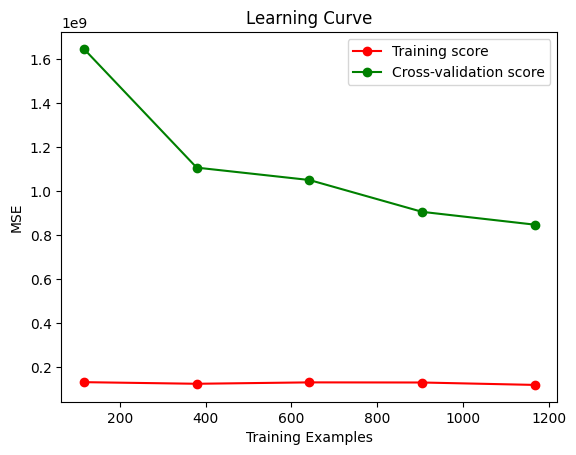

In [98]:
#check overfitting

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf,data_scaled_encoded , y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()


##GradientBooster Regressor

In [90]:
GBR_params = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1],
    'max_depth':[5,6,7]}

GridSearchCV_GBR = GridSearchCV(gbr, GBR_params, cv = 5)#, scoring = score, refit='R2')
GridSearchCV_GBR.fit(data_scaled_encoded, y)

print("Best params", GridSearchCV_GBR.best_params_)
print("Best score", GridSearchCV_GBR.best_score_)

Best params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score 0.8778080556947107


In [114]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
gbr.fit(data_scaled_encoded, y)
gbr_pred_data = gbr.predict(data_scaled_encoded)

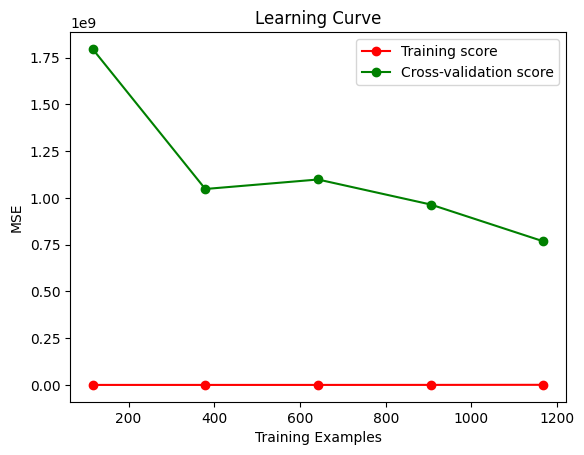

In [100]:
#check overfitting

#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(gbr,data_scaled_encoded , y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

In [115]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_gbr_data = mean_squared_error(y, gbr_pred_data)
r2_gbr_data = r2_score(y, gbr_pred_data)
rmse_gbr_data = np.sqrt(mse_gbr_data)

print(f"MSE_GBR_DATA : {mse_gbr_data}")
print(f"RMSE_GBR_Data :{rmse_gbr_data}")
print(f"R2_DATA: {r2_gbr_data}")

#compare MSE with y_var
comp_mse_ms_gbr_data = mse_gbr_data / (y_mean**2)
comp_mse_var_gbr_data = mse_gbr_data / y_var
print(f"mse_gbr_data in MS of y : {comp_mse_ms_gbr_data*100}%")
print(f"mse_gbr_data in variance of y : {comp_mse_var_gbr_data*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_GBR_DATA : 1694045.060693651
RMSE_GBR_Data :1301.5548627290557
R2_DATA: 0.9997313933965333
mse_gbr_data in MS of y : 0.0051754254676466115%
mse_gbr_data in variance of y : 0.02684226263411047%


# Catboost regressor

In [ ]:
!pip install catboost

In [92]:
from catboost import CatBoostRegressor

In [93]:
cat = CatBoostRegressor()

In [ ]:
params = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1, 0.5, 0.05],
    'depth':[5,6,7]}

GridSearchCV_cat = GridSearchCV(cat, params, cv = 5)
GridSearchCV_cat.fit(data_scaled_encoded, y)

best_params = GridSearchCV_cat.best_params_
best_score = GridSearchCV_cat.best_score_



In [95]:
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'depth': 7, 'learning_rate': 0.1, 'n_estimators': 500}
Best Score: 0.8934156894867877


In [ ]:
cat = CatBoostRegressor(n_estimators= 500,
    learning_rate= 0.1,
    depth= 7)
cat.fit(data_scaled_encoded, y)
cat_pred_data = cat.predict(data_scaled_encoded)

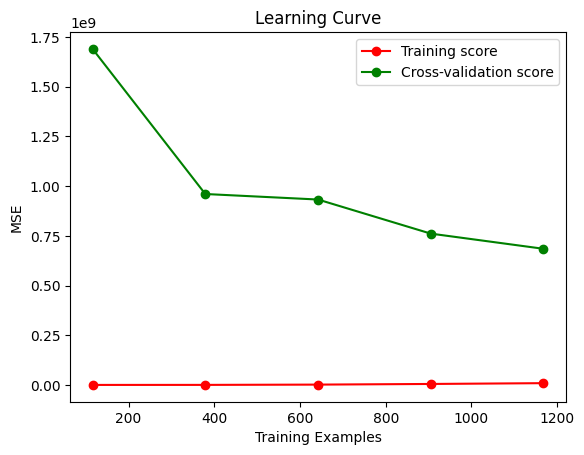

In [103]:
#check overfitting

#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(cat,data_scaled_encoded , y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MSE')
plt.legend(loc='best')
plt.show()

In [108]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_cat_data = mean_squared_error(y, cat_pred_data)
r2_cat_data = r2_score(y, cat_pred_data)
rmse_cat_data = np.sqrt(mse_cat_data)

print(f"MSE_CAT_DATA : {mse_cat_data}")
print(f"RMSE_CAT_Data :{rmse_cat_data}")
print(f"R2_CAT DATA: {r2_cat_data}")

#compare MSE with y_var
comp_mse_ms_cat_data = mse_cat_data / (y_mean**2)
comp_mse_var_cat_data = mse_cat_data / y_var
print(f"mse_cat_data in MS of y : {comp_mse_ms_cat_data*100}%")
print(f"mse_cat_data in variance of y : {comp_mse_var_cat_data*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_CAT_DATA : 14006115.074029423
RMSE_CAT_Data :3742.474458701011
R2_CAT DATA: 0.9977792001611461
mse_cat_data in MS of y : 0.04278965556396705%
mse_cat_data in variance of y : 0.2219278743073876%


In [116]:
# gbr data
mse_gbr_data = mean_squared_error(y, gbr_pred_data)
r2_gbr_data = r2_score(y, gbr_pred_data)
rmse_gbr_data = np.sqrt(mse_gbr_data)

print(f"MSE_GBR_DATA : {mse_gbr_data}")
print(f"RMSE_GBR_Data :{rmse_gbr_data}")
print(f"R2_DATA: {r2_gbr_data}")

#compare MSE with y_var
comp_mse_ms_gbr_data = mse_gbr_data / (y_mean**2)
comp_mse_var_gbr_data = mse_gbr_data / y_var
print(f"mse_gbr_data in MS of y : {comp_mse_ms_gbr_data*100}%")
print(f"mse_gbr_data in variance of y : {comp_mse_var_gbr_data*100}%")

MSE_GBR_DATA : 1694045.060693651
RMSE_GBR_Data :1301.5548627290557
R2_DATA: 0.9997313933965333
mse_gbr_data in MS of y : 0.0051754254676466115%
mse_gbr_data in variance of y : 0.02684226263411047%


# **SELECTED MODEL IS GBR REGRESSOR, **
WITH

MSE_GBR_DATA : 5.30225132071109

RMSE_GBR_Data :2.3026617903441857

R2_DATA: 0.9999999991592787

mse_gbr_data in MS of y : 1.6198746513764384e-10

mse_gbr_data in variance of y : 8.401454353540597e-10

In [ ]:
important_features = gbr.feature_importances_
imp_gbr_features = pd.DataFrame({'features': data_scaled_encoded.columns, 'importance': important_features})
imp_gbr_features.sort_values(by='importance', ascending=False, inplace=True)
imp_gbr_features

,features,importance
74,SalePrice,9.951540e-01
62,GrLivArea,1.927775e-03
60,2ndFlrSF,1.019897e-03
5,LotConfig,9.318458e-04
59,1stFlrSF,6.970411e-04
...,...,...
23,BsmtFinType2,8.937118e-11
33,GarageCond,6.787929e-11
1,Street,5.912044e-12
9,Condition2,8.485608e-14


# Test Data

In [11]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data science projects /House pricing kaggle/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [12]:
test['YrSold_num'] = 2024 - test['YrSold']
test['YearBuilt_num'] = 2024 - test['YearBuilt']
test['GarageYrBlt_num'] = 2024 - test['GarageYrBlt']
test.drop(['YearBuilt', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [15]:
test_obj= test.select_dtypes(include='object')
test_num = test.select_dtypes(exclude = 'object')

In [46]:
test_obj.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# Handling test_obj null values

In [23]:
test_obj.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [32]:
test_obj['MSZoning'] = test_obj['MSZoning'].fillna(test_obj['MSZoning'].mode()[0])
test_obj['Utilities'] = test_obj['Utilities'].fillna(test_obj['Utilities'].mode()[0])
test_obj['Exterior1st'] = test_obj['Exterior1st'].fillna(test_obj['Exterior1st'].mode()[0])
test_obj['Exterior2nd'] = test_obj['Exterior2nd'].fillna(test_obj['Exterior2nd'].mode()[0])
test_obj['BsmtQual'] = test_obj['BsmtQual'].fillna(test_obj['BsmtQual'].mode()[0])
test_obj['BsmtCond'] = test_obj['BsmtCond'].fillna(test_obj['BsmtCond'].mode()[0])
test_obj['BsmtCond'] = test_obj['BsmtCond'].fillna(test_obj['BsmtCond'].mode()[0])
test_obj['BsmtExposure'] = test_obj['BsmtExposure'].fillna(test_obj['BsmtExposure'].mode()[0])
test_obj['BsmtFinType1'] = test_obj['BsmtFinType1'].fillna(test_obj['BsmtFinType1'].mode()[0])
test_obj['BsmtFinType2'] = test_obj['BsmtFinType2'].fillna(test_obj['BsmtFinType2'].mode()[0])
test_obj['KitchenQual'] = test_obj['KitchenQual'].fillna(test_obj['KitchenQual'].mode()[0])
test_obj['Functional'] = test_obj['Functional'].fillna(test_obj['Functional'].mode()[0])
test_obj['SaleType'] = test_obj['SaleType'].fillna(test_obj['SaleType'].mode()[0])

In [ ]:
test_obj.groupby('BldgType')['GarageType'].value_counts().sort_values(ascending=False)

In [34]:
#filling garagetype
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
gtype = ['Attchd', 'Detchd', 'Detchd', 'Detchd', 'Detchd']

for i in range(len(btype)):
  test_obj.loc[(test_obj['BldgType'] == btype[i] ) & (test_obj['GarageType'].isnull()), 'GarageType'] = gtype[i]

In [ ]:
test_obj.groupby('BldgType')['GarageFinish'].value_counts().sort_values(ascending=False)

In [35]:
#filling garagefinish
btype = ['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
g_fin = ['Unf', 'Fin', 'Unf', 'Unf', 'Unf']

for i in range(len(btype)):
  test_obj.loc[(test_obj['BldgType'] == btype[i] ) & (test_obj['GarageFinish'].isnull()), 'GarageFinish'] = g_fin[i]

In [ ]:
test_obj.groupby('BldgType')['GarageQual'].value_counts().sort_values(ascending=False)

In [36]:
#filling Garagequal
test_obj['GarageQual'] = test_obj['GarageQual'].fillna('TA')

In [ ]:
test_obj.groupby('BldgType')['GarageCond'].value_counts().sort_values(ascending=False)

In [37]:
#filling GarageCOnd
test_obj['GarageCond'] = test_obj['GarageCond'].fillna('TA')

# Handling test_num null values

In [54]:
test_num.isnull().sum().sum()

0

In [48]:
test_num['MasVnrArea'] = test_num['MasVnrArea'].fillna(test_num['MasVnrArea'].mode()[0])

In [ ]:
test_num.groupby('LotArea')['LotFrontage'].value_counts().sort_values(ascending=False)

In [49]:
#filling lot frintage
area = [1680, 6000, 7200, 9600, 10800]
front = [21, 50, 60, 80, 100]

for i in range(len(area)):
  test_num.loc[(test_num['LotArea'] <= area[i]) & (test_num['LotFrontage'].isnull()), 'LotFrontage'] = front[i]

test_num.loc[test_num['LotFrontage'].isnull(), 'LotFrontage'] = front[-1]

In [51]:
test_num['BsmtFinSF1'] = test_num['BsmtFinSF1'].fillna(test_num['BsmtFinSF1'].mode()[0])
test_num['BsmtFinSF2'] = test_num['BsmtFinSF2'].fillna(test_num['BsmtFinSF2'].mode()[0])
test_num['BsmtUnfSF'] = test_num['BsmtUnfSF'].fillna(test_num['BsmtUnfSF'].mode()[0])
test_num['TotalBsmtSF'] = test_num['TotalBsmtSF'].fillna(test_num['TotalBsmtSF'].mode()[0])
test_num['GarageCars'] = test_num['GarageCars'].fillna(test_num['GarageCars'].mode()[0])
test_num['GarageArea'] = test_num['GarageArea'].fillna(test_num['GarageArea'].mode()[0])
test_num['BsmtFullBath'] = test_num['BsmtFullBath'].fillna(test_num['BsmtFullBath'].mode()[0])
test_num['BsmtHalfBath'] = test_num['BsmtHalfBath'].fillna(test_num['BsmtHalfBath'].mode()[0])

In [52]:
#filling GarageYrBlt_num
for i in test_num['GarageYrBlt_num']:
  test_num.loc[test_num['GarageYrBlt_num'].isna(), 'GarageYrBlt_num'] = test_num['YearBuilt_num']

# Test data label encoding and Scaling

In [62]:
for col in test_obj.columns:
  test_obj[col] = le.fit_transform(test_obj[col])

test_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,12,1,2,...,3,3,6,1,2,3,4,2,8,4
1,3,1,0,3,0,0,0,12,2,2,...,3,2,6,1,2,3,4,2,8,4
2,3,1,0,3,0,4,0,8,2,2,...,3,3,6,1,0,3,4,2,8,4
3,3,1,0,3,0,4,0,8,2,2,...,3,2,6,1,0,3,4,2,8,4
4,3,1,0,1,0,4,0,22,2,2,...,3,2,6,1,1,3,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,3,3,6,5,2,3,4,2,8,4
1455,4,1,3,3,0,4,0,10,2,2,...,3,3,6,4,2,3,4,2,8,0
1456,3,1,3,3,0,4,0,11,2,2,...,3,3,6,5,2,3,4,2,8,0
1457,3,1,3,3,0,4,0,11,2,2,...,3,3,6,1,2,3,4,2,8,4


In [63]:
ord_cols

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'YrSold_num']

In [ ]:
test[ord_cols]

In [64]:
test_obj = pd.concat([test_obj, test_num[ord_cols]], axis = 1)
test_obj

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YrSold_num
0,2,1,3,3,0,4,0,12,1,2,...,6,0.0,0.0,1,0,2,1,5,0,14
1,3,1,0,3,0,0,0,12,2,2,...,6,0.0,0.0,1,1,3,1,6,0,14
2,3,1,0,3,0,4,0,8,2,2,...,5,0.0,0.0,2,1,3,1,6,1,14
3,3,1,0,3,0,4,0,8,2,2,...,6,0.0,0.0,2,1,3,1,7,1,14
4,3,1,0,1,0,4,0,22,2,2,...,5,0.0,0.0,2,0,2,1,5,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,3,3,0,4,0,10,2,2,...,7,0.0,0.0,1,1,3,1,5,0,18
1455,4,1,3,3,0,4,0,10,2,2,...,5,0.0,0.0,1,1,3,1,6,0,18
1456,3,1,3,3,0,4,0,11,2,2,...,7,1.0,0.0,1,0,4,1,7,1,18
1457,3,1,3,3,0,4,0,11,2,2,...,5,0.0,1.0,1,0,3,1,6,0,18


In [66]:
test_num = test_num.drop(columns = ord_cols)
test_num

,Id,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,1461,20,80.0,11622,1961,0.0,468.0,144.0,270.0,882.0,...,140,0,0,0,120,0,0,6,63,63.0
1,1462,20,81.0,14267,1958,108.0,923.0,0.0,406.0,1329.0,...,393,36,0,0,0,0,12500,6,66,66.0
2,1463,60,74.0,13830,1998,0.0,791.0,0.0,137.0,928.0,...,212,34,0,0,0,0,0,3,27,27.0
3,1464,60,78.0,9978,1998,20.0,602.0,0.0,324.0,926.0,...,360,36,0,0,0,0,0,6,26,26.0
4,1465,120,43.0,5005,1992,0.0,263.0,0.0,1017.0,1280.0,...,0,82,0,0,144,0,0,1,32,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,1970,0.0,0.0,0.0,546.0,546.0,...,0,0,0,0,0,0,0,6,54,54.0
1455,2916,160,21.0,1894,1970,0.0,252.0,0.0,294.0,546.0,...,0,24,0,0,0,0,0,4,54,54.0
1456,2917,20,160.0,20000,1996,0.0,1224.0,0.0,0.0,1224.0,...,474,0,0,0,0,0,0,9,64,64.0
1457,2918,85,62.0,10441,1992,0.0,337.0,0.0,575.0,912.0,...,80,32,0,0,0,0,700,7,32,32.0


In [ ]:
test[ord_cols]

In [67]:
test_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1459 non-null   int64  
 1   MSSubClass       1459 non-null   int64  
 2   LotFrontage      1459 non-null   float64
 3   LotArea          1459 non-null   int64  
 4   YearRemodAdd     1459 non-null   int64  
 5   MasVnrArea       1459 non-null   float64
 6   BsmtFinSF1       1459 non-null   float64
 7   BsmtFinSF2       1459 non-null   float64
 8   BsmtUnfSF        1459 non-null   float64
 9   TotalBsmtSF      1459 non-null   float64
 10  1stFlrSF         1459 non-null   int64  
 11  2ndFlrSF         1459 non-null   int64  
 12  LowQualFinSF     1459 non-null   int64  
 13  GrLivArea        1459 non-null   int64  
 14  GarageCars       1459 non-null   float64
 15  GarageArea       1459 non-null   float64
 16  WoodDeckSF       1459 non-null   int64  
 17  OpenPorchSF   

In [68]:
missing_columns = set(data_num.columns) - set(test_num.columns)
print(missing_columns)

{'SalePrice'}


In [70]:
test_num_scaled = scaler.fit_transform(test_num)
test_num_scaled = pd.DataFrame(test_num_scaled, columns = test_num.columns)
test_num_scaled

,Id,MSSubClass,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuilt_num,GarageYrBlt_num
0,-1.730864,-0.874711,0.369838,0.363929,-1.072885,-0.563316,0.063936,0.517537,-0.649392,-0.368484,...,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,0.340945,0.540497
1,-1.728490,-0.874711,0.413893,0.897861,-1.214908,0.047057,1.063714,-0.297689,-0.338322,0.639542,...,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,0.439695,0.648596
2,-1.726115,0.061351,0.105504,0.809646,0.678742,-0.563316,0.773668,-0.297689,-0.953599,-0.264750,...,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,-0.844059,-0.756695
3,-1.723741,0.061351,0.281726,0.032064,0.678742,-0.450284,0.358376,-0.297689,-0.525879,-0.269260,...,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-0.876976,-0.792728
4,-1.721367,1.465443,-1.260220,-0.971808,0.394694,-0.563316,-0.386513,-0.297689,1.059203,0.529042,...,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,-0.679475,-0.576530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.229443,-1.591330,-0.646813,-0.563316,-0.964407,-0.297689,-0.018104,-1.126195,...,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,0.044694,0.216199
1455,1.723741,2.401505,-2.229443,-1.599808,-0.646813,-0.563316,-0.410684,-0.297689,-0.594497,-1.126195,...,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,0.044694,0.216199
1456,1.726115,-0.874711,3.894286,2.055150,0.584059,-0.563316,1.725105,-0.297689,-1.266956,0.402757,...,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,0.373861,0.576530
1457,1.728490,0.646389,-0.423163,0.125527,0.394694,-0.563316,-0.223912,-0.297689,0.048227,-0.300831,...,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-0.679475,-0.576530


In [73]:
test_num_scaled = test_num_scaled.drop('Id', axis = 1)
test_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1459 non-null   float64
 1   LotFrontage      1459 non-null   float64
 2   LotArea          1459 non-null   float64
 3   YearRemodAdd     1459 non-null   float64
 4   MasVnrArea       1459 non-null   float64
 5   BsmtFinSF1       1459 non-null   float64
 6   BsmtFinSF2       1459 non-null   float64
 7   BsmtUnfSF        1459 non-null   float64
 8   TotalBsmtSF      1459 non-null   float64
 9   1stFlrSF         1459 non-null   float64
 10  2ndFlrSF         1459 non-null   float64
 11  LowQualFinSF     1459 non-null   float64
 12  GrLivArea        1459 non-null   float64
 13  GarageCars       1459 non-null   float64
 14  GarageArea       1459 non-null   float64
 15  WoodDeckSF       1459 non-null   float64
 16  OpenPorchSF      1459 non-null   float64
 17  EnclosedPorch 

# Test Algorithms

In [78]:
test_scaled_encoded = pd.concat([test_obj, test_num_scaled], axis =1)
#test_scaled_encoded.drop('Id', axis = 1, inplace = True)

In [ ]:
test_scaled_encoded.info()

In [110]:
#as training data has 1460 rows and test data has 1459 rows, adding one row to the test data
test_scaled_encoded = test_scaled_encoded.reset_index(drop=True)

# Initialize an empty dictionary to hold the sampled values for the new row
new_row = {}

# Iterate over each column and sample a value based on the column's value counts
for col in test_scaled_encoded.columns:
    # For numeric columns, sample a random value within the column's range
    col_min = test_scaled_encoded[col].min()
    col_max = test_scaled_encoded[col].max()
    new_row[col] = np.random.uniform(col_min, col_max)

# Convert the dictionary to a DataFrame with one row
new_row_df = pd.DataFrame([new_row], columns = test_scaled_encoded.columns)


# Append the new row to the original DataFrame using concat
test_scaled_encoded = pd.concat([test_scaled_encoded, new_row_df], axis = 0, ignore_index=True)

print(test_scaled_encoded.tail())

      MSZoning    Street  LotShape  LandContour  Utilities  LotConfig  \
1455  4.000000  1.000000  3.000000     3.000000        0.0   4.000000   
1456  3.000000  1.000000  3.000000     3.000000        0.0   4.000000   
1457  3.000000  1.000000  3.000000     3.000000        0.0   4.000000   
1458  3.000000  1.000000  3.000000     3.000000        0.0   4.000000   
1459  2.647665  0.457686  2.154083     1.971893        0.0   1.867981   

      LandSlope  Neighborhood  Condition1  Condition2  ...  WoodDeckSF  \
1455   0.000000     10.000000    2.000000    2.000000  ...   -0.729632   
1456   0.000000     11.000000    2.000000    2.000000  ...    2.982161   
1457   0.000000     11.000000    2.000000    2.000000  ...   -0.103169   
1458   1.000000     11.000000    2.000000    2.000000  ...    0.758218   
1459   0.817432     19.689748    2.912246    1.445368  ...    3.728507   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch   PoolArea   MiscVal  \
1455    -0.353093      -0.360738  -

In [109]:
assert test_scaled_encoded.columns.is_unique, "Column names must be unique"

In [111]:
duplicates = test_scaled_encoded.columns[test_scaled_encoded.columns.duplicated()]
print(duplicates)

Index([], dtype='object')


## Rf regressor

In [ ]:
data_scaled_encoded

In [ ]:
test_scaled_encoded.isnull().sum().sum()

In [ ]:
test_num_scaled.isnull().sum().sum()


In [ ]:
test_scaled_encoded.isnull().sum().sum()

In [ ]:
test_scaled_encoded['BsmtFullBath'] = test_scaled_encoded['BsmtFullBath'].fillna(test_scaled_encoded['BsmtFullBath'].mode()[0])
test_scaled_encoded['BsmtHalfBath'] = test_scaled_encoded['BsmtHalfBath'].fillna(test_scaled_encoded['BsmtHalfBath'].mode()[0])

In [ ]:
missing_cols = set(data_scaled_encoded.columns) - set(test_scaled_encoded.columns)
print(missing_cols)

In [ ]:
"""rf_params ={
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state = 42)
GridSearchCV_rf = GridSearchCV(rf, rf_params, cv=5,
)
GridSearchCV_rf.fit(test_scaled_encoded, y)
# Best parameters and score
best_params = GridSearchCV_rf.best_params_
best_score = GridSearchCV_rf.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")"""

In [ ]:
rf = RandomForestRegressor(max_features = 'sqrt', n_estimators= 300, random_state = 42)
rf.fit(test_scaled_encoded, y)
rf_pred_test = rf.predict(test_scaled_encoded)

In [ ]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")

mse_rf_test = mean_squared_error(y, rf_pred_test)
r2_rf_test = r2_score(y, rf_pred_test)

print(f"MSE_RF_DATA : {mse_rf_test}")
print(f"R2_DATA: {r2_rf_test}")

#compare
comp_mse_ms = mse_rf_test / (y_mean**2)
comp_mse_var = mse_rf_test / y_var
print(f"MSE_test in MS of y : {comp_mse_ms*100}%")
print(f"MSE_test in variance : {comp_mse_var*100}%")


#compare train data and test data
print(f"MSE_RF_DATA in MS of y: {comp_mse_ms_data*100 }% ","\n",f"MSE_RF_DATA in variance of y: {comp_mse_var_data*100}%")
print(f"MSE_test in MS of y : {comp_mse_ms*100}%", "\n", f"MSE_test in variance : {comp_mse_var*100}%")

## GBR in test data

In [113]:
#apply GBR from trained model
gbr = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 500)
gbr.fit(test_scaled_encoded, y)
gbr_pred_test = gbr.predict(test_scaled_encoded)

In [117]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_gbr_test = mean_squared_error(y, gbr_pred_test)
r2_gbr_test = r2_score(y, gbr_pred_test)
rmse_gbr_test = np.sqrt(mse_gbr_test)

print(f"MSE_GBR_TEST : {mse_gbr_test}")
print(f"RMSE_GBR_TEST :{rmse_gbr_test}")
print(f"R2_TEST: {r2_gbr_test}")

#compare MSE with y_var
comp_mse_ms_gbr_test = mse_gbr_test/ (y_mean**2)
comp_mse_var_gbr_test = mse_gbr_test / y_var
print(f"mse_gbr_TEST in MS of y : {comp_mse_ms_gbr_test*100}%")
print(f"mse_gbr_TEST in variance of y : {comp_mse_var_gbr_test*100}%")


#compate TRAIN MODEL AND TEST MODEL
print(f"MSE GBR_DATA in MS of y: {comp_mse_ms_gbr_data*100 }% ","\n",f"MSE_gbr_DATA in variance of y: {comp_mse_var_gbr_data*100}%")
print(f"MSE_GBR_Test in MS of y : {comp_mse_ms_gbr_test*100}%", "\n", f"MSE_gbr_test in variance : {comp_mse_var_gbr_test*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_GBR_TEST : 36443437.010599226
RMSE_GBR_TEST :6036.839985505598
R2_TEST: 0.9942215540417421
mse_gbr_TEST in MS of y : 0.11133723441571332%
mse_gbr_TEST in variance of y : 0.5774488118560543%
MSE GBR_DATA in MS of y: 0.0051754254676466115%  
 MSE_gbr_DATA in variance of y: 0.02684226263411047%
MSE_GBR_Test in MS of y : 0.11133723441571332% 
 MSE_gbr_test in variance : 0.5774488118560543%


In [ ]:
cat_test = CatBoostRegressor(n_estimators= 500,
    learning_rate= 0.1,
    depth= 7)
cat_test.fit(test_scaled_encoded, y)
cat_pred_test = cat_test.predict(test_scaled_encoded)

In [120]:
y_mean = y.mean()
y_var = y.var()

print(f"Mean of y: {y_mean}")
print(f"Variance of y: {y_var}")
print(f"Mean squared:{(y_mean**2)}")

mse_cat_test = mean_squared_error(y, cat_pred_test)
r2_cat_test = r2_score(y, cat_pred_test)
rmse_cat_test = np.sqrt(mse_cat_test)

print(f"MSE_CAT_TEST : {mse_cat_test}")
print(f"RMSE_CAT_TEST:{rmse_cat_test}")
print(f"R2_TEST: {r2_cat_test}")

#compare MSE with y_var
comp_mse_ms_cat_test = mse_cat_test/ (y_mean**2)
comp_mse_var_cat_test = mse_cat_test / y_var
print(f"mse_cat_test in MS of y : {comp_mse_ms_cat_test*100}%")
print(f"mse_cat_test in variance of y : {comp_mse_var_cat_test*100}%")


#compate TRAIN MODEL AND TEST MODEL
print(f"MSE cat_DATA in MS of y: {comp_mse_ms_cat_data*100 }% ","\n",f"MSE_cat_DATA in variance of y: {comp_mse_var_cat_data*100}%")
print(f"mse_cat_test in MS of y : {comp_mse_ms_cat_test*100}%", "\n", f"mse_cat_test in variance of y : {comp_mse_var_cat_test*100}%")

Mean of y: 180921.19589041095
Variance of y: 6311111264.297448
Mean squared:32732479122.41645
MSE_CAT_TEST : 343100385.7932274
RMSE_CAT_TEST:18522.96914085934
R2_TEST: 0.9455982420926157
mse_cat_test in MS of y : 1.0481955384743809%
mse_cat_test in variance of y : 5.436449642936555%
MSE cat_DATA in MS of y: 0.04278965556396705%  
 MSE_cat_DATA in variance of y: 0.2219278743073876%
mse_cat_test in MS of y : 1.0481955384743809% 
 mse_cat_test in variance of y : 5.436449642936555%


# Notes

We GBR is best model after verifying all other algos

Mean of y: 180921.19589041095 Variance of y: 6311111264.297448

Mean squared:32732479122.41645

MSE_GBR_TEST : 36443437.010599226

RMSE_GBR_TEST :6036.839985505598

R2_TEST: 0.9942215540417421


> (MSE in MS value and Variance)



mse_gbr_TEST in MS of y : 0.11133723441571332%

mse_gbr_TEST in variance of y : 0.5774488118560543%


> Training data (MSE in MS value and Variance )




MSE GBR_DATA in MS of y: 0.0051754254676466115%  

 MSE_gbr_DATA in variance of y: 0.02684226263411047%